C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

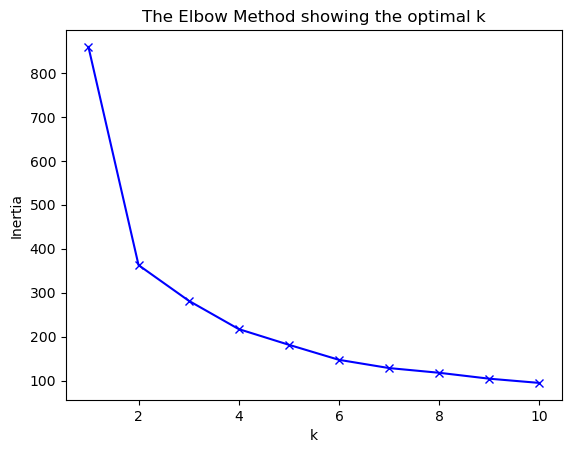

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Завантаження датасетів
data_2d = pd.read_csv('C:/Users/Alexander/Desktop/data/data/data_2d.csv')
data_mnist = pd.read_csv('C:/Users/Alexander/Desktop/data/data/mnist.csv')

def optimal_clusters(data, max_k):
    inertia = []
    for k in range(1, max_k+1):
        kmeans = KMeans(n_clusters=k, random_state=0).fit(data)
        inertia.append(kmeans.inertia_)
    plt.plot(range(1, max_k+1), inertia, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Inertia')
    plt.title('The Elbow Method showing the optimal k')
    plt.show()

def plot_clusters_2d(data, labels, k):
    plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=labels)
    plt.title(f'Кластеризация для двумерного набора данных з k={k}')
    plt.show()

optimal_clusters(data_2d, 10)
optimal_clusters(data_mnist, 10)

# Кластеризація двовимірного датасету
k_2d = 3
kmeans_2d = KMeans(n_clusters=k_2d, n_init=10, random_state=0).fit(data_2d)
plot_clusters_2d(data_2d, kmeans_2d.labels_, k_2d)

# Кластеризація датасету MNIST з використанням PCA
scaler = StandardScaler()
data_mnist_scaled = scaler.fit_transform(data_mnist)

pca = PCA(n_components=2)
data_mnist_2d = pca.fit_transform(data_mnist_scaled)

k_mnist = 10  # взято з ліктевого методу
kmeans_mnist = KMeans(n_clusters=k_mnist, n_init=10, random_state=0).fit(data_mnist_2d)

plt.figure(figsize=(10, 6))
plt.scatter(data_mnist_2d[:, 0], data_mnist_2d[:, 1], c=kmeans_mnist.labels_, cmap='rainbow', marker='o', edgecolor='black')
plt.scatter(kmeans_mnist.cluster_centers_[:, 0], kmeans_mnist.cluster_centers_[:, 1], s=300, c='red', marker='*', label='Centroids')
plt.title('KMeans Clustering of MNIST Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()